In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
ls


2019_NO_MALARIA_NO_LAB_DATA.ipynb    2019_no_malaria.csv
2019_NO_MALARIA_WITH_LAB_DATA.ipynb


In [3]:
  # Read file 
df = read_file = pd.read_csv ("2019_no_malaria.csv")

In [4]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0
1,SHC0702,12,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0
2,SHC0703,54,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0
3,SHC0704,30,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0
4,SHC0705,17,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,SHC1102,26,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0
156,SHC1103,12,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
157,SHC1104,54,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0
158,SHC1105,11,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        160 non-null    object 
 1   Age                               160 non-null    int64  
 2   Sexe                              160 non-null    object 
 3   Lieu actuel de ésidence_category  157 non-null    object 
 4   Temperature                       160 non-null    float64
 5   Temperature_category              160 non-null    object 
 6   NbreJrsFievre                     146 non-null    float64
 7   Rythme cardiaque                  149 non-null    float64
 8   Rythme cardiaque_category         149 non-null    object 
 9   Antibiotiques pris                159 non-null    float64
 10  Antipaludiques pris               148 non-null    float64
 11  Diagnostic paludisme recu         159 non-null    float64
 12  enceinte

In [6]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.isna().sum())

Unnamed: 0                           0
Age                                  0
Sexe                                 0
Lieu actuel de ésidence_category     3
Temperature                          0
Temperature_category                 0
NbreJrsFievre                       14
Rythme cardiaque                    11
Rythme cardiaque_category           11
Antibiotiques pris                   1
Antipaludiques pris                 12
Diagnostic paludisme recu            1
enceinte                            23
sympt_mal_tete                       1
sympt_courbatures                    1
sympt_vertiges                       1
sympt_vomissements                   1
sympt_fatigue_faiblesse              1
sympt_mal_dos                        1
sympt_douleur_thoracique             1
sympt_difficulte_respirer            1
sympt_eruption_cutanee               1
sympt_toux_maldegorge                1
sympt_inflammation                   1
sympt_saignement                     1
sympt_convulsions        

In [7]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling as pp
# pp.ProfileReport(df)

In [8]:
df1 = df.copy()

# Delete columns year and lab data

# Delete column temperature, 
df1 = df1.drop(['Unnamed: 0', 'NbreJrsFievre', 'Rythme cardiaque', 'enceinte', 'Lieu actuel de ésidence_category', 'Temperature', 
                'sympt_convulsions', 'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_dental', 'sympt_anorex', 
                'sympt_wound',  'WBC_COUNT','LYMPH_COUNT','MID_COUNT','GRAN_COUNT','LYMPH_PCT',
                   'MID_PCT','GRAN_PCT','RBC_COUNT','HGB_COUNT','HCT_PCT','MCV', 'MCH', 'MCHC','RDW-CV','RDW-SD',
                   'PLT', 'MPV','PDW','PCT'], axis=1)


# Print the updated DataFrame
print("Updated DataFrame:")
df1

Updated DataFrame:


,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.10,17.8,2.0,1.0,2.0,no_travel,seche,0
1,12,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,2,2,0.85,19.8,2.0,2.0,1.0,inside_thies_region,seche,0
2,54,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,2,2,1.82,22.0,2.0,1.0,1.0,outside_thies_region,seche,0
3,30,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,2,2,0.98,19.3,2.0,1.0,1.0,outside_senegal,seche,0
4,17,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,2,2,1.00,21.3,2.0,1.0,2.0,no_travel,seche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.63,10.2,2.0,2.0,1.0,inside_thies_region,pluie,0
156,12,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2,2,0.94,10.1,1.0,1.0,2.0,no_travel,pluie,0
157,54,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,0.54,11.1,1.0,1.0,1.0,inside_thies_region,pluie,0
158,11,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1


In [9]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df1.isna().sum())

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          12
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      3
hemoglobine                  15
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category       8
saison                        0
Borrelia                      0
dtype: int64


In [10]:
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        160 non-null    int64  
 1   Sexe                       160 non-null    object 
 2   Temperature_category       160 non-null    object 
 3   Rythme cardiaque_category  149 non-null    object 
 4   Antibiotiques pris         159 non-null    float64
 5   Antipaludiques pris        148 non-null    float64
 6   Diagnostic paludisme recu  159 non-null    float64
 7   sympt_mal_tete             159 non-null    float64
 8   sympt_courbatures          159 non-null    float64
 9   sympt_vertiges             159 non-null    float64
 10  sympt_vomissements         159 non-null    float64
 11  sympt_fatigue_faiblesse    159 non-null    float64
 12  sympt_mal_dos              159 non-null    float64
 13  sympt_douleur_thoracique   159 non-null    float64

In [11]:
for i in df2.columns:
    print(i,len(df2[i].unique()))

Age 50
Sexe 2
Temperature_category 3
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 75
hemoglobine 86
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
Borrelia 2


In [12]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df2.isna().sum())

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          12
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      3
hemoglobine                  15
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category       8
saison                        0
Borrelia                      0
dtype: int64


In [13]:
from fancyimpute import IterativeImputer

columnsSelected = ['glycemie', 'hemoglobine']

# Perform multiple imputation using MICE
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df2[columnsSelected])

# Replace the missing values in the original DataFrame with the imputed values
df2[columnsSelected] = imputed_data

# Display the imputed data
print(df2)


     Age Sexe Temperature_category Rythme cardiaque_category  \
0     54    F             no_fever                    normal   
1     12    F                fever                    normal   
2     54    F             no_fever                      high   
3     30    M             no_fever                    normal   
4     17    F             no_fever                    normal   
..   ...  ...                  ...                       ...   
155   26    F                fever                      high   
156   12    M                fever                       low   
157   54    M             no_fever                    normal   
158   11    F         severe_fever                    normal   
159   15    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  NaN                        2.0   
2     

In [14]:
# # multiple imputation implements the MICE algorithm to fill in missing data
# from fancyimpute import IterativeImputer

# columnsSelected = ['glycemie', 'hemoglobine']

# # Perform multiple imputation using MICE
# imputer = IterativeImputer()
# imputed_data = imputer.fit_transform(df2[columnsSelected])



# # Convert the imputed data back to a DataFrame
# imputed_data = pd.DataFrame(imputed_data, columns=columnsSelected)

# # Display the imputed data
# print(imputed_data)

In [15]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df2.isna().sum())

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          12
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      0
hemoglobine                   0
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category       8
saison                        0
Borrelia                      0
dtype: int64


In [16]:
df2

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.100000,17.800000,2.0,1.0,2.0,no_travel,seche,0
1,12,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,2,2,0.850000,19.800000,2.0,2.0,1.0,inside_thies_region,seche,0
2,54,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,2,2,1.820000,22.000000,2.0,1.0,1.0,outside_thies_region,seche,0
3,30,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,2,2,0.980000,19.300000,2.0,1.0,1.0,outside_senegal,seche,0
4,17,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,2,2,1.000000,21.300000,2.0,1.0,2.0,no_travel,seche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.630000,10.200000,2.0,2.0,1.0,inside_thies_region,pluie,0
156,12,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2,2,0.940000,10.100000,1.0,1.0,2.0,no_travel,pluie,0
157,54,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,0.540000,11.100000,1.0,1.0,1.0,inside_thies_region,pluie,0
158,11,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.021924,14.272787,2.0,1.0,2.0,no_travel,pluie,1


In [17]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df2.isna().sum())

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          12
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      0
hemoglobine                   0
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category       8
saison                        0
Borrelia                      0
dtype: int64


In [18]:
import pandas as pd

def mode_imputation(data, categorical_columns):
    # Make a copy of the original data to avoid modifying the original dataframe
    imputed_data = data.copy()
    
    # Iterate over each column in the list of categorical columns
    for column in categorical_columns:
        # Check if the column contains categorical data (object or categorical type)
        if imputed_data[column].dtype == 'float64' or imputed_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(imputed_data[column]):
            # Calculate the mode (most frequent value) of the column
            mode_value = imputed_data[column].mode().iloc[0]
            
            # Fill missing values with the mode value
            imputed_data[column].fillna(mode_value, inplace=True)
    
    return imputed_data

# Example usage:
# Suppose you have a DataFrame called 'data' with some categorical columns containing missing values,
# and you want to perform MODE imputation on columns 'A', 'B', and 'C'.
# categorical_columns = ['A', 'B', 'C']
# imputed_data = mode_imputation(data, categorical_columns)

# The resulting 'imputed_data' will contain the original data with missing values in the specified categorical columns replaced by their respective modes.


In [19]:
columns_to_impute = ['Rythme cardiaque_category', 'Antibiotiques pris', 'Antipaludiques pris','Diagnostic paludisme recu',
 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
 'sympt_mal_dos','sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement','contact_pers_febrile','contact_presence_rats','voyage_fait','voyage_details_category']

imputed_dataFinal = mode_imputation(df2, columns_to_impute)

imputed_dataFinal

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.100000,17.800000,2.0,1.0,2.0,no_travel,seche,0
1,12,F,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2,2,0.850000,19.800000,2.0,2.0,1.0,inside_thies_region,seche,0
2,54,F,no_fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.820000,22.000000,2.0,1.0,1.0,outside_thies_region,seche,0
3,30,M,no_fever,normal,2.0,2.0,1.0,1.0,1.0,1.0,...,2,2,0.980000,19.300000,2.0,1.0,1.0,outside_senegal,seche,0
4,17,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,2,2,1.000000,21.300000,2.0,1.0,2.0,no_travel,seche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.630000,10.200000,2.0,2.0,1.0,inside_thies_region,pluie,0
156,12,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2,2,0.940000,10.100000,1.0,1.0,2.0,no_travel,pluie,0
157,54,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,0.540000,11.100000,1.0,1.0,1.0,inside_thies_region,pluie,0
158,11,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.021924,14.272787,2.0,1.0,2.0,no_travel,pluie,1


In [20]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(imputed_dataFinal.isna().sum())

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
Borrelia                     0
dtype: int64


In [21]:
df3 = imputed_dataFinal.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.100000,17.800000,2.0,1.0,2.0,no_travel,seche,0
1,12,F,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,2,2,0.850000,19.800000,2.0,2.0,1.0,inside_thies_region,seche,0
2,54,F,no_fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.820000,22.000000,2.0,1.0,1.0,outside_thies_region,seche,0
3,30,M,no_fever,normal,2.0,2.0,1.0,1.0,1.0,1.0,...,2,2,0.980000,19.300000,2.0,1.0,1.0,outside_senegal,seche,0
4,17,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,2,2,1.000000,21.300000,2.0,1.0,2.0,no_travel,seche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.630000,10.200000,2.0,2.0,1.0,inside_thies_region,pluie,0
156,12,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,2,2,0.940000,10.100000,1.0,1.0,2.0,no_travel,pluie,0
157,54,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,0.540000,11.100000,1.0,1.0,1.0,inside_thies_region,pluie,0
158,11,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.021924,14.272787,2.0,1.0,2.0,no_travel,pluie,1


In [22]:
# pd.set_option('display.max_columns', None)
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df3.isna().sum())

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
Borrelia                     0
dtype: int64


In [23]:
bpos = len(df3[df3['Borrelia'] == 1])
bneg = len(df3[df3['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df3.columns))
print(df3.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 144
                           count   min    max
Age                        160.0  2.00  62.00
Antibiotiques pris         160.0  1.00   2.00
Antipaludiques pris        160.0  1.00   2.00
Diagnostic paludisme recu  160.0  1.00   2.00
sympt_mal_tete             160.0  1.00   2.00
sympt_courbatures          160.0  1.00   2.00
sympt_vertiges             160.0  1.00   2.00
sympt_vomissements         160.0  1.00   2.00
sympt_fatigue_faiblesse    160.0  1.00   2.00
sympt_mal_dos              160.0  1.00   2.00
sympt_douleur_thoracique   160.0  1.00   2.00
sympt_difficulte_respirer  160.0  1.00   2.00
sympt_eruption_cutanee     160.0  1.00   2.00
sympt_toux_maldegorge      160.0  1.00   2.00
sympt_inflammation         160.0  1.00   2.00
sympt_saignement           160.0  1.00   2.00
sympt_abdo_pain            160.0  1.00   2.00
sympt_dysphagia            160.0  2.00   2.00
sympt_eye_problem          160.0  2.00   2.00
glycemie             

In [24]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 50
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 77
hemoglobine 98
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2


In [25]:
# Select binary columns to Label encode
columns_to_encode = ['Temperature_category', 'Rythme cardiaque_category']


# Apply label encoding to binary columns
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df3[col] = label_encoder.fit_transform(df3[col])

df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54,F,1,2,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.100000,17.800000,2.0,1.0,2.0,no_travel,seche,0
1,12,F,0,2,2.0,2.0,2.0,1.0,1.0,1.0,...,2,2,0.850000,19.800000,2.0,2.0,1.0,inside_thies_region,seche,0
2,54,F,1,0,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.820000,22.000000,2.0,1.0,1.0,outside_thies_region,seche,0
3,30,M,1,2,2.0,2.0,1.0,1.0,1.0,1.0,...,2,2,0.980000,19.300000,2.0,1.0,1.0,outside_senegal,seche,0
4,17,F,1,2,2.0,2.0,2.0,1.0,2.0,2.0,...,2,2,1.000000,21.300000,2.0,1.0,2.0,no_travel,seche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,F,0,0,2.0,2.0,2.0,1.0,1.0,2.0,...,2,2,1.630000,10.200000,2.0,2.0,1.0,inside_thies_region,pluie,0
156,12,M,0,1,2.0,2.0,1.0,1.0,2.0,1.0,...,2,2,0.940000,10.100000,1.0,1.0,2.0,no_travel,pluie,0
157,54,M,1,2,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,0.540000,11.100000,1.0,1.0,1.0,inside_thies_region,pluie,0
158,11,F,2,2,2.0,2.0,2.0,1.0,2.0,1.0,...,2,2,1.021924,14.272787,2.0,1.0,2.0,no_travel,pluie,1


In [26]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 50
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 77
hemoglobine 98
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2


In [27]:
# Select columns to one-hot encode
# columns_to_encode = ['Temperature_category', 'Rythme cardiaque_category','Antibiotiques pris','Antipaludiques pris','Diagnostic paludisme recu','sympt_mal_tete','sympt_courbatures','sympt_vertiges','sympt_vomissements','sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee', 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_convulsions', 'sympt_perte_conaissance', 'sympt_Prostration', 'goutte_epaisse_Resultat', 'frottis_mince_Resultat', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_details_category']

columns_to_encode = ['Sexe','Antibiotiques pris', 'Antipaludiques pris',
       'Diagnostic paludisme recu', 'sympt_mal_tete', 'sympt_courbatures',
       'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
       'sympt_mal_dos', 'sympt_douleur_thoracique','sympt_difficulte_respirer', 
        'sympt_eruption_cutanee','sympt_toux_maldegorge', 'sympt_inflammation', 
        'sympt_saignement','sympt_abdo_pain', 'contact_pers_febrile', 'contact_presence_rats', 
        'voyage_fait', 'voyage_details_category', 'saison' ]

# Perform one-hot encoding
encoded_df = pd.get_dummies(df3, columns=columns_to_encode)

# Print the encoded dataframe
# print(encoded_df)
encoded_df

# columns_to_encode

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Borrelia,Sexe_F,Sexe_M,...,contact_presence_rats_1.0,contact_presence_rats_2.0,voyage_fait_1.0,voyage_fait_2.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,saison_seche
0,54,1,2,2,2,1.100000,17.800000,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,12,0,2,2,2,0.850000,19.800000,0,1,0,...,0,1,1,0,1,0,0,0,0,1
2,54,1,0,2,2,1.820000,22.000000,0,1,0,...,1,0,1,0,0,0,0,1,0,1
3,30,1,2,2,2,0.980000,19.300000,0,0,1,...,1,0,1,0,0,0,1,0,0,1
4,17,1,2,2,2,1.000000,21.300000,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,0,0,2,2,1.630000,10.200000,0,1,0,...,0,1,1,0,1,0,0,0,1,0
156,12,0,1,2,2,0.940000,10.100000,0,0,1,...,1,0,0,1,0,1,0,0,1,0
157,54,1,2,2,2,0.540000,11.100000,0,0,1,...,1,0,1,0,1,0,0,0,1,0
158,11,2,2,2,2,1.021924,14.272787,1,1,0,...,1,0,0,1,0,1,0,0,1,0


In [28]:
df4 = encoded_df.copy()
df4

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Borrelia,Sexe_F,Sexe_M,...,contact_presence_rats_1.0,contact_presence_rats_2.0,voyage_fait_1.0,voyage_fait_2.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,saison_seche
0,54,1,2,2,2,1.100000,17.800000,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,12,0,2,2,2,0.850000,19.800000,0,1,0,...,0,1,1,0,1,0,0,0,0,1
2,54,1,0,2,2,1.820000,22.000000,0,1,0,...,1,0,1,0,0,0,0,1,0,1
3,30,1,2,2,2,0.980000,19.300000,0,0,1,...,1,0,1,0,0,0,1,0,0,1
4,17,1,2,2,2,1.000000,21.300000,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,0,0,2,2,1.630000,10.200000,0,1,0,...,0,1,1,0,1,0,0,0,1,0
156,12,0,1,2,2,0.940000,10.100000,0,0,1,...,1,0,0,1,0,1,0,0,1,0
157,54,1,2,2,2,0.540000,11.100000,0,0,1,...,1,0,1,0,1,0,0,0,1,0
158,11,2,2,2,2,1.021924,14.272787,1,1,0,...,1,0,0,1,0,1,0,0,1,0


In [29]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 50
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 77
hemoglobine 98
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2


In [30]:
for i in df4.columns:
    print(i,len(df4[i].unique()))

Age 50
Temperature_category 3
Rythme cardiaque_category 3
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 77
hemoglobine 98
Borrelia 2
Sexe_F 2
Sexe_M 2
Antibiotiques pris_1.0 2
Antibiotiques pris_2.0 2
Antipaludiques pris_1.0 2
Antipaludiques pris_2.0 2
Diagnostic paludisme recu_1.0 2
Diagnostic paludisme recu_2.0 2
sympt_mal_tete_1.0 2
sympt_mal_tete_2.0 2
sympt_courbatures_1.0 2
sympt_courbatures_2.0 2
sympt_vertiges_1.0 2
sympt_vertiges_2.0 2
sympt_vomissements_1.0 2
sympt_vomissements_2.0 2
sympt_fatigue_faiblesse_1.0 2
sympt_fatigue_faiblesse_2.0 2
sympt_mal_dos_1.0 2
sympt_mal_dos_2.0 2
sympt_douleur_thoracique_1.0 2
sympt_douleur_thoracique_2.0 2
sympt_difficulte_respirer_1.0 2
sympt_difficulte_respirer_2.0 2
sympt_eruption_cutanee_1.0 2
sympt_eruption_cutanee_2.0 2
sympt_toux_maldegorge_1.0 2
sympt_toux_maldegorge_2.0 2
sympt_inflammation_1.0 2
sympt_inflammation_2.0 2
sympt_saignement_1.0 2
sympt_saignement_2.0 2
sympt_abdo_pain_1 2
sympt_abdo_pain_2 2
contact_pers_febrile_1.0

In [31]:
df4 = df4.drop(['Sexe_M','Antibiotiques pris_2.0', 'Antipaludiques pris_2.0','Diagnostic paludisme recu_2.0',
                'sympt_mal_tete_2.0', 'sympt_courbatures_2.0', 'sympt_vertiges_2.0', 'sympt_vomissements_2.0',  
                'sympt_fatigue_faiblesse_2.0','sympt_mal_dos_2.0','sympt_douleur_thoracique_2.0',
                'sympt_difficulte_respirer_2.0','sympt_eruption_cutanee_2.0', 'sympt_toux_maldegorge_2.0',
                'sympt_inflammation_2.0','sympt_saignement_2.0','sympt_abdo_pain_2','contact_pers_febrile_2.0', 
                'contact_presence_rats_2.0', 'voyage_fait_2.0', 'saison_seche'], axis=1)

In [32]:
for i in df4.columns:
    print(i,len(df4[i].unique()))

Age 50
Temperature_category 3
Rythme cardiaque_category 3
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 77
hemoglobine 98
Borrelia 2
Sexe_F 2
Antibiotiques pris_1.0 2
Antipaludiques pris_1.0 2
Diagnostic paludisme recu_1.0 2
sympt_mal_tete_1.0 2
sympt_courbatures_1.0 2
sympt_vertiges_1.0 2
sympt_vomissements_1.0 2
sympt_fatigue_faiblesse_1.0 2
sympt_mal_dos_1.0 2
sympt_douleur_thoracique_1.0 2
sympt_difficulte_respirer_1.0 2
sympt_eruption_cutanee_1.0 2
sympt_toux_maldegorge_1.0 2
sympt_inflammation_1.0 2
sympt_saignement_1.0 2
sympt_abdo_pain_1 2
contact_pers_febrile_1.0 2
contact_presence_rats_1.0 2
voyage_fait_1.0 2
voyage_details_category_inside_thies_region 2
voyage_details_category_no_travel 2
voyage_details_category_outside_senegal 2
voyage_details_category_outside_thies_region 2
saison_pluie 2


In [33]:
df4

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Borrelia,Sexe_F,Antibiotiques pris_1.0,...,sympt_saignement_1.0,sympt_abdo_pain_1,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,54,1,2,2,2,1.100000,17.800000,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,12,0,2,2,2,0.850000,19.800000,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,54,1,0,2,2,1.820000,22.000000,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,30,1,2,2,2,0.980000,19.300000,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,17,1,2,2,2,1.000000,21.300000,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,26,0,0,2,2,1.630000,10.200000,0,1,0,...,0,0,0,0,1,1,0,0,0,1
156,12,0,1,2,2,0.940000,10.100000,0,0,0,...,1,0,1,1,0,0,1,0,0,1
157,54,1,2,2,2,0.540000,11.100000,0,0,0,...,0,0,1,1,1,1,0,0,0,1
158,11,2,2,2,2,1.021924,14.272787,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [34]:
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_scale = ['Age', 'glycemie', 'hemoglobine']

# Standardize numerical features
scaler = StandardScaler()
df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])

print("DataFrame with Standardized Numerical Features:")
df4

DataFrame with Standardized Numerical Features:


,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Borrelia,Sexe_F,Antibiotiques pris_1.0,...,sympt_saignement_1.0,sympt_abdo_pain_1,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,2.213558,1,2,2,2,2.714553e-01,8.566928e-01,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.690602,0,2,2,2,-5.977513e-01,1.342455e+00,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,2.213558,1,0,2,2,2.774770e+00,1.876793e+00,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,0.554038,1,2,2,2,-1.457639e-01,1.221014e+00,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,-0.344869,1,2,2,2,-7.622739e-02,1.706776e+00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.277451,0,0,2,2,2.114173e+00,-9.892021e-01,0,1,0,...,0,0,0,0,1,1,0,0,0,1
156,-0.690602,0,1,2,2,-2.848370e-01,-1.013490e+00,0,0,0,...,1,0,1,1,0,0,1,0,0,1
157,2.213558,1,2,2,2,-1.675568e+00,-7.706093e-01,0,0,0,...,0,0,1,1,1,1,0,0,0,1
158,-0.759749,2,2,2,2,-7.720105e-16,-8.628863e-16,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [35]:
# Moving target column to the end of dataframe
column_to_move = 'Borrelia'

# Get a list of column names excluding the column to be moved
other_columns = [col for col in df4.columns if col != column_to_move]

# Rearrange the dataframe with the column to be moved as the last column
df4 = df4[other_columns + [column_to_move]]

# Print the updated dataframe
df4

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,...,sympt_abdo_pain_1,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.213558,1,2,2,2,2.714553e-01,8.566928e-01,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.690602,0,2,2,2,-5.977513e-01,1.342455e+00,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2.213558,1,0,2,2,2.774770e+00,1.876793e+00,1,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0.554038,1,2,2,2,-1.457639e-01,1.221014e+00,0,0,0,...,1,0,1,1,0,0,1,0,0,0
4,-0.344869,1,2,2,2,-7.622739e-02,1.706776e+00,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.277451,0,0,2,2,2.114173e+00,-9.892021e-01,1,0,0,...,0,0,0,1,1,0,0,0,1,0
156,-0.690602,0,1,2,2,-2.848370e-01,-1.013490e+00,0,0,0,...,0,1,1,0,0,1,0,0,1,0
157,2.213558,1,2,2,2,-1.675568e+00,-7.706093e-01,0,0,0,...,0,1,1,1,1,0,0,0,1,0
158,-0.759749,2,2,2,2,-7.720105e-16,-8.628863e-16,1,0,0,...,0,0,1,0,0,1,0,0,1,1


In [36]:
df5 = df4.copy()
df5

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,...,sympt_abdo_pain_1,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.213558,1,2,2,2,2.714553e-01,8.566928e-01,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.690602,0,2,2,2,-5.977513e-01,1.342455e+00,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2.213558,1,0,2,2,2.774770e+00,1.876793e+00,1,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0.554038,1,2,2,2,-1.457639e-01,1.221014e+00,0,0,0,...,1,0,1,1,0,0,1,0,0,0
4,-0.344869,1,2,2,2,-7.622739e-02,1.706776e+00,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.277451,0,0,2,2,2.114173e+00,-9.892021e-01,1,0,0,...,0,0,0,1,1,0,0,0,1,0
156,-0.690602,0,1,2,2,-2.848370e-01,-1.013490e+00,0,0,0,...,0,1,1,0,0,1,0,0,1,0
157,2.213558,1,2,2,2,-1.675568e+00,-7.706093e-01,0,0,0,...,0,1,1,1,1,0,0,0,1,0
158,-0.759749,2,2,2,2,-7.720105e-16,-8.628863e-16,1,0,0,...,0,0,1,0,0,1,0,0,1,1


*df5* is a copy of df4 - dd that is cleaned, imputed, encoded and standardized

**Handling data imbalancing**

In [37]:
bpos = len(df5[df5['Borrelia'] == 1])
bneg = len(df5[df5['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df5.columns))
print(df5.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 144
                                              count       min       max
Age                                           160.0 -1.382069  2.766731
Temperature_category                          160.0  0.000000  2.000000
Rythme cardiaque_category                     160.0  0.000000  2.000000
sympt_dysphagia                               160.0  2.000000  2.000000
sympt_eye_problem                             160.0  2.000000  2.000000
glycemie                                      160.0 -1.675568  4.478415
hemoglobine                                   160.0 -2.203607  3.431230
Sexe_F                                        160.0  0.000000  1.000000
Antibiotiques pris_1.0                        160.0  0.000000  1.000000
Antipaludiques pris_1.0                       160.0  0.000000  1.000000
Diagnostic paludisme recu_1.0                 160.0  0.000000  1.000000
sympt_mal_tete_1.0                            160.0  0.000000  1.000000
sympt

In [38]:
# pfrom sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# data = encoded_norm_df.copy()
# X = data.iloc[:, :-1]  #independent columns
# y = data.iloc[:,-1]    #target column
# [12:08 AM, 7/28/2023] Dr. Mosca: #apply SelectKBest class to extract top best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print best features

In [39]:
df6 = df5.copy()
df6

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,...,sympt_abdo_pain_1,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.213558,1,2,2,2,2.714553e-01,8.566928e-01,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.690602,0,2,2,2,-5.977513e-01,1.342455e+00,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2.213558,1,0,2,2,2.774770e+00,1.876793e+00,1,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0.554038,1,2,2,2,-1.457639e-01,1.221014e+00,0,0,0,...,1,0,1,1,0,0,1,0,0,0
4,-0.344869,1,2,2,2,-7.622739e-02,1.706776e+00,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.277451,0,0,2,2,2.114173e+00,-9.892021e-01,1,0,0,...,0,0,0,1,1,0,0,0,1,0
156,-0.690602,0,1,2,2,-2.848370e-01,-1.013490e+00,0,0,0,...,0,1,1,0,0,1,0,0,1,0
157,2.213558,1,2,2,2,-1.675568e+00,-7.706093e-01,0,0,0,...,0,1,1,1,1,0,0,0,1,0
158,-0.759749,2,2,2,2,-7.720105e-16,-8.628863e-16,1,0,0,...,0,0,1,0,0,1,0,0,1,1


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Assuming your target variable column is named 'target'
y = df6['Borrelia']  # Target variable
X = df6.drop('Borrelia', axis=1)# Features

In [41]:
X

,Age,Temperature_category,Rythme cardiaque_category,sympt_dysphagia,sympt_eye_problem,glycemie,hemoglobine,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,...,sympt_saignement_1.0,sympt_abdo_pain_1,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,2.213558,1,2,2,2,2.714553e-01,8.566928e-01,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.690602,0,2,2,2,-5.977513e-01,1.342455e+00,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2.213558,1,0,2,2,2.774770e+00,1.876793e+00,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,0.554038,1,2,2,2,-1.457639e-01,1.221014e+00,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,-0.344869,1,2,2,2,-7.622739e-02,1.706776e+00,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.277451,0,0,2,2,2.114173e+00,-9.892021e-01,1,0,0,...,0,0,0,0,1,1,0,0,0,1
156,-0.690602,0,1,2,2,-2.848370e-01,-1.013490e+00,0,0,0,...,1,0,1,1,0,0,1,0,0,1
157,2.213558,1,2,2,2,-1.675568e+00,-7.706093e-01,0,0,0,...,0,0,1,1,1,1,0,0,0,1
158,-0.759749,2,2,2,2,-7.720105e-16,-8.628863e-16,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
155    0
156    0
157    0
158    1
159    0
Name: Borrelia, Length: 160, dtype: int64

In [43]:
# # Create a logistic regression model
# log_reg = LogisticRegression()

# # Make predictions using cross-validation
# # 'cv' specifies the number of cross-validation folds (e.g., cv=5 for 5-fold cross-validation)
# predicted = cross_val_predict(log_reg, X, y, cv=5)

# # Calculate accuracy on the entire dataset (average accuracy over all cross-validation folds)
# accuracy = accuracy_score(y, predicted)
# print("Cross-Validation Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
# precision = precision_score(y, predicted)
# recall = recall_score(y, predicted)
# f1 = f1_score(y, predicted)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
accuracy_bootstraps = []
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_bootstraps = []

# Perform optimism bootstrap using cross-validation
for i in range(n_bootstrap):
    # Bootstrap resample the entire data with replacement
    X_boot, y_boot = resample(X_selected, y_resampled, random_state=i, replace=True)

    # Fit the weighted logistic regression model to the bootstrapped data
    weighted_logreg.fit(X_boot, y_boot)

    # Predict on the bootstrapped data using cross-validation
    y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')

    # Evaluate model performance on the bootstrapped data and store the results
    accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# Calculate the optimism in model performance
optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_recall = np.mean(recall_bootstraps) - recall_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_precision = np.mean(precision_bootstraps) - precision_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y_resampled, y_pred_boot[:, 1])

# Print optimism in model performance
print("Optimism in Accuracy:", optimism_accuracy)
print("Optimism in Recall:", optimism_recall)
print("Optimism in Precision:", optimism_precision)
print("Optimism in F1 Score:", optimism_f1_score)
print("Optimism in AUC:", optimism_auc)

Optimism in Accuracy: 0.33053819444444443
Optimism in Recall: 0.34701428299662695
Optimism in Precision: 0.3089505963078712
Optimism in F1 Score: 0.32686757995896376
Optimism in AUC: 0.41521124034978896


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem

# Load your DataFrame (replace 'df' with your DataFrame)
# Make sure to have the target variable 'y' and feature columns 'X'
# For example:
# X = df.drop('target_variable_column', axis=1)
# y = df['target_variable_column']

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Perform optimism bootstrap using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_selected, y_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
       # Fit the weighted logistic regression model to the training data
    weighted_logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = weighted_logreg.predict(X_test)

    # Calculate recall, precision, and F1 score for the test set
    recall_bootstraps.append(recall_score(y_test, y_pred_test))
    precision_bootstraps.append(precision_score(y_test, y_pred_test))
    f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

    # Calculate AUC-ROC curve for the test set
    y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
    auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

    # Calculate AUC-PR curve for the test set
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
    auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

    # Calculate odds ratio
    odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

Recall: 0.854 [0.727 - 0.926]
Precision: 0.772 [0.744 - 0.788]
F1 Score: 0.810 [0.736 - 0.850]
AUC-ROC: 0.885 [0.825 - 0.923]
AUC-PR: 0.869 [0.814 - 0.931]
Odds Ratio: 0.573 [0.473 - 0.744]


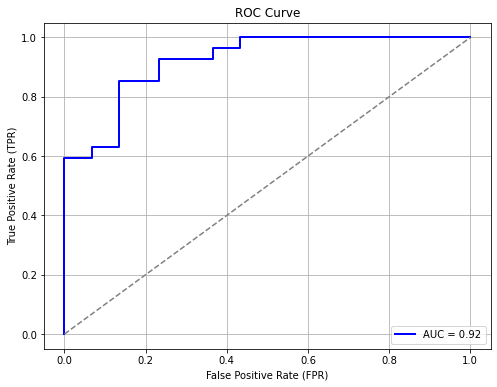

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


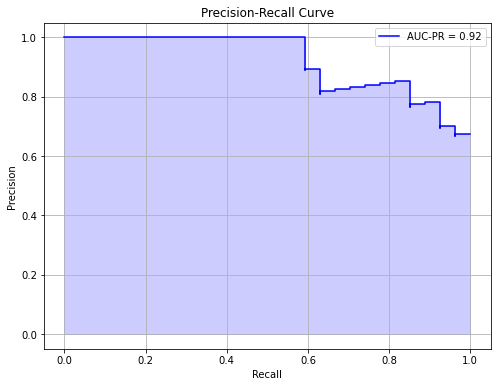

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

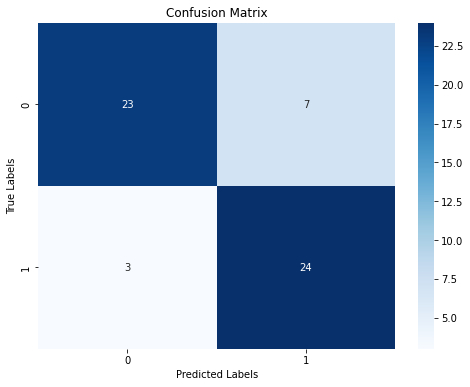

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
selected_features

Index(['Age', 'Temperature_category', 'Rythme cardiaque_category', 'glycemie',
       'hemoglobine', 'Sexe_F', 'Antibiotiques pris_1.0',
       'Antipaludiques pris_1.0', 'Diagnostic paludisme recu_1.0',
       'sympt_mal_tete_1.0', 'sympt_courbatures_1.0', 'sympt_vertiges_1.0',
       'sympt_vomissements_1.0', 'sympt_fatigue_faiblesse_1.0',
       'sympt_mal_dos_1.0', 'sympt_eruption_cutanee_1.0',
       'sympt_toux_maldegorge_1.0', 'sympt_inflammation_1.0',
       'sympt_abdo_pain_1', 'contact_pers_febrile_1.0',
       'contact_presence_rats_1.0', 'voyage_fait_1.0',
       'voyage_details_category_no_travel',
       'voyage_details_category_outside_senegal', 'saison_pluie'],
      dtype='object')

In [50]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Print the feature importances
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance:.3f}")

Feature Importances:
sympt_toux_maldegorge_1.0: 2.119
voyage_details_category_no_travel: 1.834
voyage_fait_1.0: 1.630
Diagnostic paludisme recu_1.0: 1.205
sympt_mal_tete_1.0: 1.095
Sexe_F: 0.993
Antibiotiques pris_1.0: 0.912
sympt_vertiges_1.0: 0.894
sympt_fatigue_faiblesse_1.0: 0.676
sympt_vomissements_1.0: 0.600
sympt_inflammation_1.0: 0.572
Age: 0.541
Temperature_category: 0.517
Rythme cardiaque_category: 0.451
sympt_abdo_pain_1: 0.437
voyage_details_category_outside_senegal: 0.436
saison_pluie: 0.361
sympt_courbatures_1.0: 0.336
hemoglobine: 0.310
sympt_eruption_cutanee_1.0: 0.292
contact_pers_febrile_1.0: 0.227
sympt_mal_dos_1.0: 0.140
Antipaludiques pris_1.0: 0.110
glycemie: 0.108
contact_presence_rats_1.0: 0.100


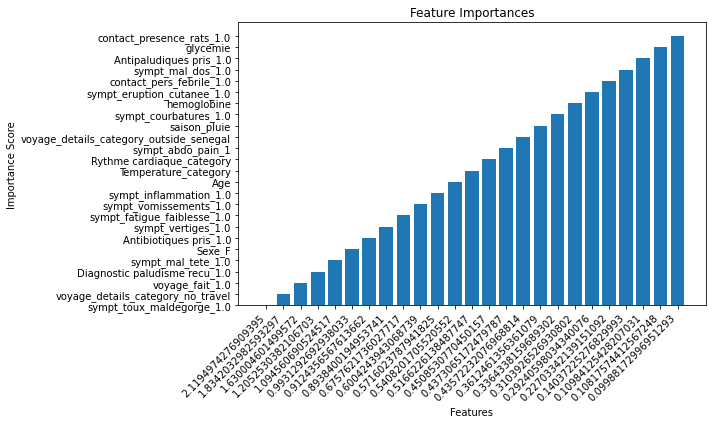

In [51]:
import matplotlib.pyplot as plt

# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

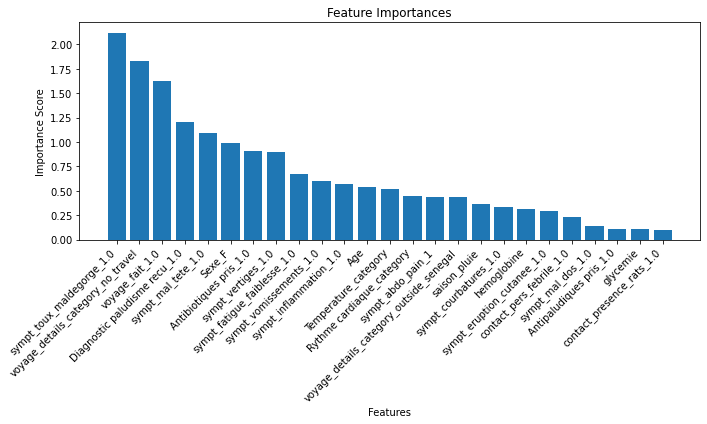

In [52]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot with numerical values for bar heights
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), [score for score, _ in sorted_feature_importances])  # Use list comprehension for bar heights
plt.xticks(range(len(features)), [name for _, name in sorted_feature_importances], rotation=45, ha='right')  # Set xticks with feature names
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()